In [4]:
import wbgapi as wb
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pytz
import seaborn as sns
import scipy.stats as stats
import statsmodels as sm
import plotly.express as px
from pandas import DataFrame
import plotly.express as px
from tabulate import tabulate
import plotly.graph_objs as go
import statsmodels.api
import statsmodels
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

<h1 style="color:black; background-color:white; padding:10px; padding-bottom:10px;text-align: center;">Methodology-for-Outliers-Detection</h1>

<h2 style="color:black; background-color:yellow; padding:5px; padding-bottom:10px; margin-bottom:-10px">I. Introduction</h2>
<p style="color:black; background-color:yellow; padding:5px; padding-bottom:20px;margin-bottom:-10px">
Handling missing data is an important step of any data analysis. In real life, the study of given processes and phenomena inevitably encounters missing data, which should be subject to peprocessing analysis. To reveal the nature of the missing data in general, whether they are completely random, random or non-random. To think about what could be done with them so as not to distort the database drastically, but on the contrary to improve their suitability for objective analysis. This report provides an overview of possible tools for dealing with missing data. The emphasis is not on their research, which as a methodology was done in a previous report, but on working with them. Different methods of visualization, imputation and removal are shown in order to enrich the theory and practice of data refinement as a pre-processing step in the field of economic data and others. 
<p style="color:black; background-color:yellow; padding:5px;padding-bottom:20px;margin-bottom:-10px">The minimum wage in the EU and countries close to the EU is used as an example database. Since the minimum wage is formed either on the basis of collective labor contracts, state decisions or on the basis of the change in basic parameters such as the average wage, etc. , its use is for purely educational purposes.</p>
<p style="color:black; background-color:yellow; padding:5px;">In this paper, we will focus on the imputation of missing data and the applicability of the algorithms in the minimum wage example. The basic logarithms of Univariate and Multivariate Imputation will be used. Their behavior will be evaluated and visualized.</p>

<h2 style="color:black; background-color:yellow; padding:5px; margin-bottom:-15px">Content</h2>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">The content of the empirical part of the report includes the following logical steps:</ul>
<li style="color:black; background-color:white; padding:5px">Import the database</li>
<li style="color:black; background-color:white; padding:5px">Check the missing values</li>
<li style="color:black; background-color:white; padding:5px">Dealing with missing values</li>
<li style="color:black; background-color:white; padding:5px">Visualization of imputation algorithms</li>

<h2 style="color:black; background-color:yellow; padding:5px; padding-bottom:10px; margin-bottom:-10px">II. Theoretical foundations of missing data.</h2>
<p style="color:black; background-color:white; padding:5px; margin-bottom:-15px"><b>Types of Missing data</b></p>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">There are four types of missing data:</ul>
<li style="color:black; background-color:white; padding:5px">Missing completely at random (MCAR): The fact that it is missing is independent of the remaining variables.</li>
<li style="color:black; background-color:white; padding:5px">Missing at random (MAR):  The missing value can roughly be interpolated from the remaining values to a reasonable degree of accuracy.</li>
<li style="color:black; background-color:white; padding:5px">Missing not at random (MNAR): The reason why the data is missing is related to the remaining variables</li>
<li style="color:black; background-color:white; padding:5px">Structurally Missing Data: The missing data is missing for а reason.</li>

<p style="color:black; background-color:white; padding:5px;  margin-bottom:-15px"><b>Methods for handling missing data</b></p>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">There are three methods at general:</ul>
<li style="color:black; background-color:white; padding:5px">Remove the missing data;</li>
<li style="color:black; background-color:white; padding:5px">Imputatе missing data;</li>
<li style="color:black; background-color:white; padding:5px">Keep the missing values;</li>

<h2 style="color:black; background-color:yellow; padding:5px; padding-bottom:10px; margin-bottom:-10px">III. Methodology and empirical analysis </h2>
<p style="color:black; background-color:white; padding:5px;margin-bottom:-10px">More information on Eurostat's minimum wage methodology please visit: https://ec.europa.eu/eurostat/cache/metadata/en/earn_minw_esms.htm </p>

<p style="color:black; background-color:white; padding:5px;margin-bottom:-10px"><b>Statistical concepts and definitions</b></p>
<p style="color:black; background-color:white; padding:5px;margin-bottom:-10px">Minimum wage statistics refer to national minimum wages. The basic national minimum wage is fixed at an hourly, weekly or monthly rate, and this minimum wage is enforced by law (the government), often after consultation with the social partners, or directly by national intersectoral agreement. The national minimum wage usually applies to all employees, or at least to a large majority of employees in the country. Gross wages are reported.</p>

<p style="color:black; background-color:white; padding:5px;margin-bottom:-10px"><b>Reference area</b></p>
<p style="color:black; background-color:white; padding:5px;margin-bottom:-10px">Minimum wage statistics cover EU Member States and the candidate countries with a national minimum wage. The national minimum wage is in 21 of the EU Member States: Belgium, Bulgaria, Czechia, Germany (from 1 January 2015), Estonia, Ireland, Greece, Spain, France, Croatia, Latvia, Lithuania, Luxembourg, Hungary, Malta, the Netherlands, Poland, Portugal, Romania, Slovenia and Slovakia.  In all these countries, except Belgium, the national minimum wage is enforced by the government, often after consultation with the social partners. In Belgium, the national minimum wage is set by national intersectoral agreement and acquires legal force by royal decree. The following candidate countries have a national minimum wage: Albania, North Macedonia, Montenegro, Serbia and Turkey. Data cover also the USA having a national minimum wage. Country-specific information is available in annex.</p>

<p style="color:black; background-color:white; padding:5px;margin-bottom:-10px">There is no national minimum wage in 6 EU Member States and the EFTA countries (data is flagged (z)):Cyprus: minimum wages are set by the government for some specific occupations. Denmark, Italy, Austria, Finland and Sweden as well as Iceland, Norway and Switzerland: minimum wages are set by sectoral collective agreements. </p>
<p style="color:black; background-color:white; padding:5px;margin-bottom:-10px">No EU aggregates are calculated due to the nature of the data: not all countries have a national minimum wage and the meaningfulness of a minimum wage at EU level (e.g. calculated as the mean of national minimum wages) is questionable.</p>
<p style="color:black; background-color:white; padding:5px;margin-bottom:-10px"><b>Reference Period</b>: Monthly minimum wages: 1 January (S1) and 1 July (S2)</p>
<p style="color:black; background-color:white; padding:5px;">More about the algorithms used in my current report visit: https://scikit-learn.org/stable/modules/impute.html#impute</p>

---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">1. Import the database</h3>
<p style="color:black; background-color:white; padding:5px;">
As a first step, the database is loaded and functions are executed to reveal the main parameters of the data.</p>

In [5]:
def load_and_name_db_WB (db, *args):
    global df_name
    df_name = db
    globals()[df_name] = wb.data.DataFrame(indicators, wb.region.members(region), range(start_period, end_period))
    globals()[df_name].columns = (new_column_names)
    return globals()[df_name]

In [6]:
name_db = "empl_unempl_world"
indicators = ['SL.UEM.TOTL.NE.ZS', "SL.EMP.TOTL.SP.NE.ZS"]
new_column_names = ['unemployment', "employment"]
region = "WLD"
start_period = 2010
end_period = 2011

load_and_name_db_WB(name_db, indicators, region, start_period, end_period)

,unemployment,employment
economy,,
ABW,57.130001,10.60
AFG,NaN,NaN
AGO,69.980003,9.43
ALB,47.430000,14.09
AND,NaN,NaN
...,...,...
XKX,NaN,NaN
YEM,31.860001,17.82
ZAF,41.610001,23.18


<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Extraction of basic information about the data</h4>
<p style="color:black; background-color:white; padding:5px;">
Parallel to the previous substep, it is important to outline the database parameters such as size, number of cases, data type, etc. In this way, we will understand what the "idea" of the database is and what can and should be done with it in terms of technical content.</p>

In [7]:
def db_info (df):
    observations = None
    features = None
    observations, features = df.shape
    print("1. Оbservations and features: \n {} Оbservations and {} features".format(observations, features))
    print("------------------------------------------------------")
    print (f"2. Number of cases in the table: {df.size}")
    print("------------------------------------------------------")
    print(f"3. The sum of element types by type is as follows: \n {df.dtypes.value_counts(ascending=True)}")
    print("------------------------------------------------------")

    list_objects = []
    list_int = []
    list_float64 = []

    for col in df.columns:
        if df[col].dtypes == "object":
            list_objects += [col]
        elif df[col].dtypes == "float64":
            list_float64 += [col]
        elif df[col].dtypes == "int64" or df[col].dtypes == "int32":
            list_int += [col]
    print("4. Group the features by data type:")
    print(f" object = {list_objects} \n")
    print(f" int = {list_int} \n")
    print(f" float64 = {list_float64}")

In [8]:
db_info(empl_unempl_world)

1. Оbservations and features: 
 217 Оbservations and 2 features
------------------------------------------------------
2. Number of cases in the table: 434
------------------------------------------------------
3. The sum of element types by type is as follows: 
 float64    2
dtype: int64
------------------------------------------------------
4. Group the features by data type:
 object = [] 

 int = [] 

 float64 = ['unemployment', 'employment']


<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Descriptive statistics</h4>
<p style="color:black; background-color:white; padding:5px"> The output of the descriptive statistics for the two databases aims, on the one hand, to give us a first deeper look at the data, and on the other hand, to alert us to the difference between the scales, the need for precessing and graphical analysis of their distribution.</p>

In [9]:
statsmodels.stats.descriptivestats.describe(empl_unempl_world).round(2)

,unemployment,employment
nobs,217.00,217.00
missing,83.00,82.00
mean,56.03,8.50
std_err,0.96,0.53
upper_ci,57.91,9.54
lower_ci,54.16,7.47
std,11.08,6.13
iqr,12.76,6.33
iqr_normal,9.46,4.69
mad,8.49,4.45


---

<span style="background-color:white">
<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px"> Second basic step. Missing values </h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px"> In this step, missing values analysis is done. The goal is to examine their proportions, check for a pattern, and remove them where appropriate: </ul>
<li style="color:black; background-color:white; padding:5px">general check for missing data</li>
<li style="color:black; background-color:white; padding:5px">searching for a pattern in the missing data</li>
<li style="color:black; background-color:white; padding:5px">check for Outliers in missing data</li>
<li style="color:black; background-color:white; padding:5px">visualization of missing data</li>
<li style="color:black; background-color:white; padding:5px">cluster visualization of missing data</li>
</span>

In [10]:
empl_unempl_world = empl_unempl_world.dropna(axis = 0, how = 'all')
empl_unempl_world

,unemployment,employment
economy,,
ABW,57.130001,10.60
AGO,69.980003,9.43
ALB,47.430000,14.09
ARG,55.540001,7.71
ARM,50.619999,19.01
...,...,...
VNM,75.320000,1.11
VUT,63.200001,1.85
YEM,31.860001,17.82


---

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">Step four: Outliers</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">We move on to the next step after the following manipulations:</ul>
<li style="color:black; background-color:white; padding:5px">First: we loaded and processed the databases in an analysis-friendly form;</li>
<li style="color:black; background-color:white; padding:5px">Second: we analyzed the missing values ​​and removed those for which there was a pattern;</li>
<li style="color:black; background-color:white; padding:5px">Third: we filled in the missing values ​​using the imputation method</li>
<li style="color:black; background-color:white; padding:5px">Fourth: we visualized the data graphically and studied its dynamics both in original and imputed form.</li>
<p style="color:black; background-color:white; padding:5px;">Next is an analysis for the presence of Outliers, which will give us another path of development and an opportunity for analysis, namely refining the databases.</p>

<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">Since the topic of outliers is multi-layered, we will take several approaches.</ul>
<li style="color:black; background-color:white; padding:5px">First: an author's approach to remove Outliers on a functional path using intervals and boxplots;</li>
<li style="color:black; background-color:white; padding:5px">Second: by standardizing the data through a functional best method approach;</li>
<li style="color:black; background-color:white; padding:5px">Third: partially through other algorithms like ransats, etc.</li>

<p style="color:black; background-color:white; padding:5px;">Let's review the data for outliers. In the next two functions we will test if there are any.</p>

In [11]:
def find_outliers_IQR1(df):
    for col in df.columns:
        q1=df.quantile(0.25)
        q3=df.quantile(0.75)
        IQR=q3-q1
        outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
        df99 = outliers.count()
    
    print (df99)
    print("number of outliers: "+ str(df99.sum()))
    print("max outlier value: "+ str(df99.max()))
    print("min outlier value: "+ str(df99.min()))

In [12]:
find_outliers_IQR1(empl_unempl_world)

unemployment    2
employment      8
dtype: int64
number of outliers: 10
max outlier value: 8
min outlier value: 2


<p style="color:black; background-color:white; padding:5px;">In "df_labor_market" dataframe, the primary analysis shows the presence of outliers only in the unemployment rate and the absence or absence of such outliers in the employment and economic activity levels.</p>

<p style="color:black; background-color:white; padding:5px;">In df_economics_removed_outliers dataframe, the primary analysis shows the presence of outliers mainly in the unemployment rate, but also in the social dimensions: poverty, early leaving, temporary employment, NEETs... which warrants further investigation.</p>

<p style="color:black; background-color:white; padding:5px;">As a second step, we will examine the obtained results graphically to get a greater idea of the distribution of values</p>

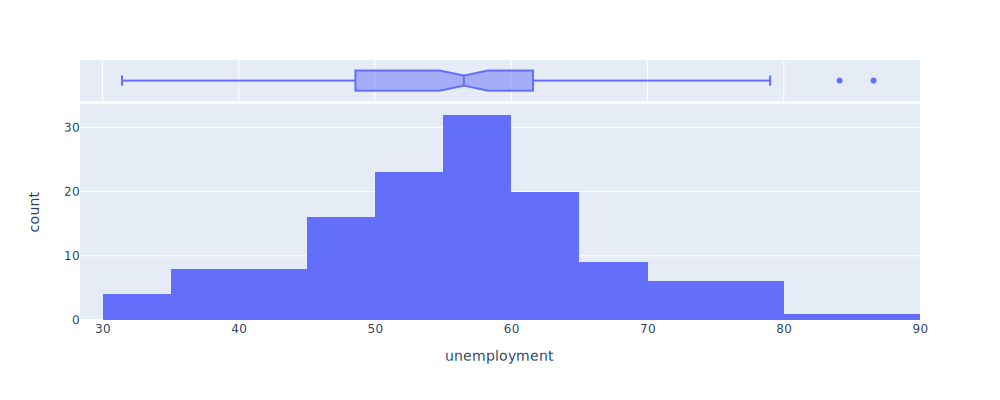

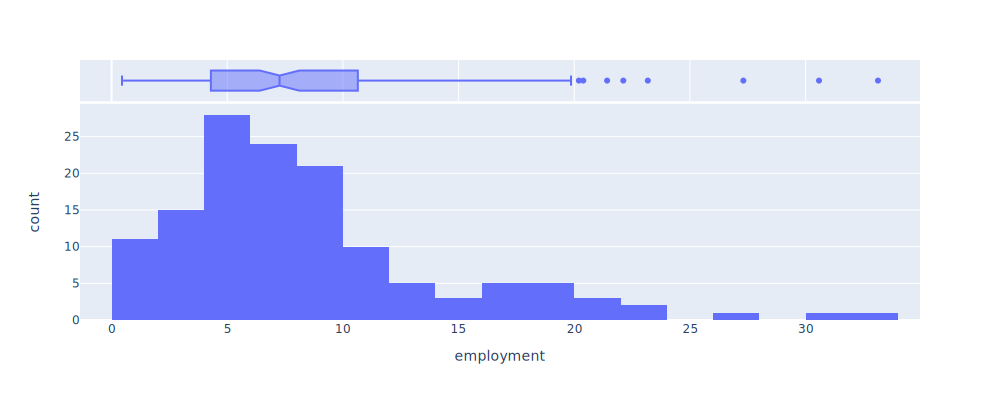

In [ ]:
fig = px.histogram(empl_unempl_world, x="unemployment", marginal="box",width=1000, height=400)
fig1 = px.histogram(empl_unempl_world, x="employment", marginal="box",width=1000, height=400)

fig.show(renderer="svg")
fig1.show(renderer="svg")

<p style="color:black; background-color:white; padding:5px;">The above graphs clearly show that there are really outliers only in the unemployment rate. Let us examine in detail the distribution of unemployment values using z-score as an indicator of the presence of outliers.</p>

In [44]:
from scipy.stats import norm
from scipy.stats import multivariate_normal as mn

def z_score(df, threshold=1):
    mean, std = np.mean(df), np.std(df)
    z_score = np.abs((df - mean) / std)
    good = z_score < threshold
    print(f"z-score of {threshold} corresponds to a prob of {100 * 2 * norm.sf(3):0.2f}%")
    print(f"Rejection {(~good).sum()} points")
    return good

In [45]:
z_score(empl_unempl_world['unemployment'], threshold=3).sum()

z-score of 3 corresponds to a prob of 0.27%
Rejection 4 points


134

In [46]:
z_score(empl_unempl_world['employment'], threshold=3).sum()

z-score of 3 corresponds to a prob of 0.27%
Rejection 6 points


132

z-score of 1 corresponds to a prob of 0.27%
Rejection 44 points
z-score of 2 corresponds to a prob of 0.27%
Rejection 10 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 4 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 4 points


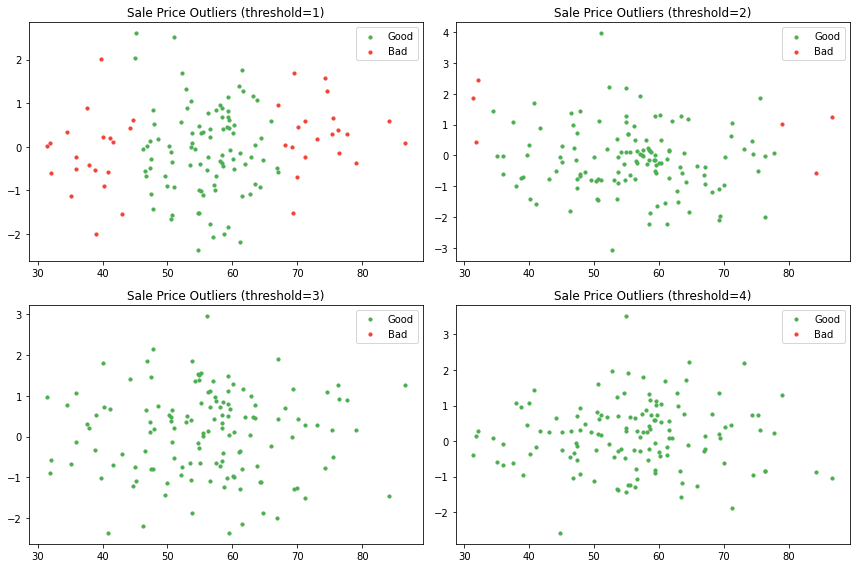

In [49]:
from scipy.stats import norm
from scipy.stats import multivariate_normal as mn

plt.figure(figsize=(12, 8))

for i, threshold in zip(range(1, 5), range(1, 5)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=empl_unempl_world.shape[0])
    good = z_score(empl_unempl_world['unemployment'], threshold=threshold)
    plt.scatter(empl_unempl_world['unemployment'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(empl_unempl_world['unemployment'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"Sale Price Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 1 corresponds to a prob of 0.27%
Rejection 44 points
z-score of 2 corresponds to a prob of 0.27%
Rejection 10 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 4 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 4 points


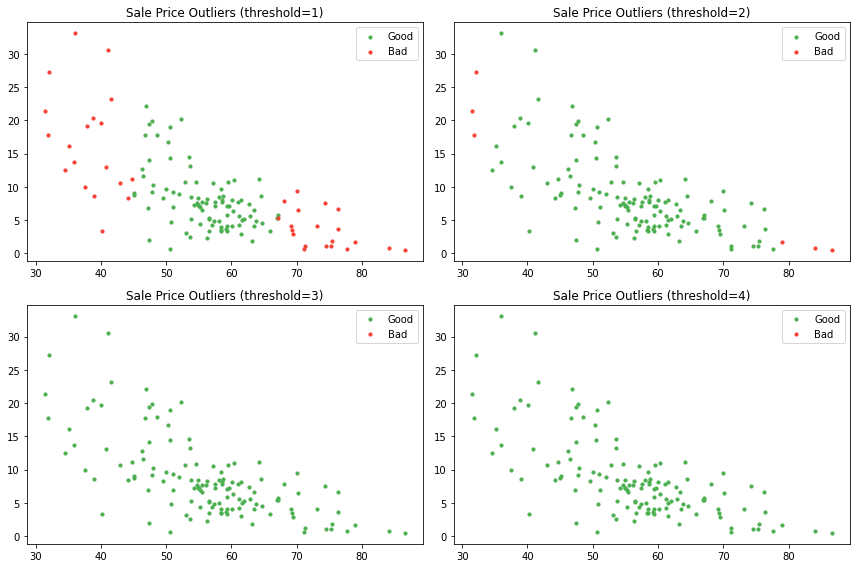

In [50]:
plt.figure(figsize=(12, 8))

for i, threshold in zip(range(1, 5), range(1, 5)):
    plt.subplot(2, 2, i)
    #visual_scatter = np.random.normal(size=empl_unempl_world.shape[0])
    good = z_score(empl_unempl_world['unemployment'], threshold=threshold)
    plt.scatter(empl_unempl_world['unemployment'][good], empl_unempl_world['employment'][good], s=10, label="Good", color="#4CAF50")
    plt.scatter(empl_unempl_world['unemployment'][~good], empl_unempl_world['employment'][~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"Sale Price Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 1 corresponds to a prob of 0.27%
Rejection 34 points
z-score of 2 corresponds to a prob of 0.27%
Rejection 9 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 6 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 4 points


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


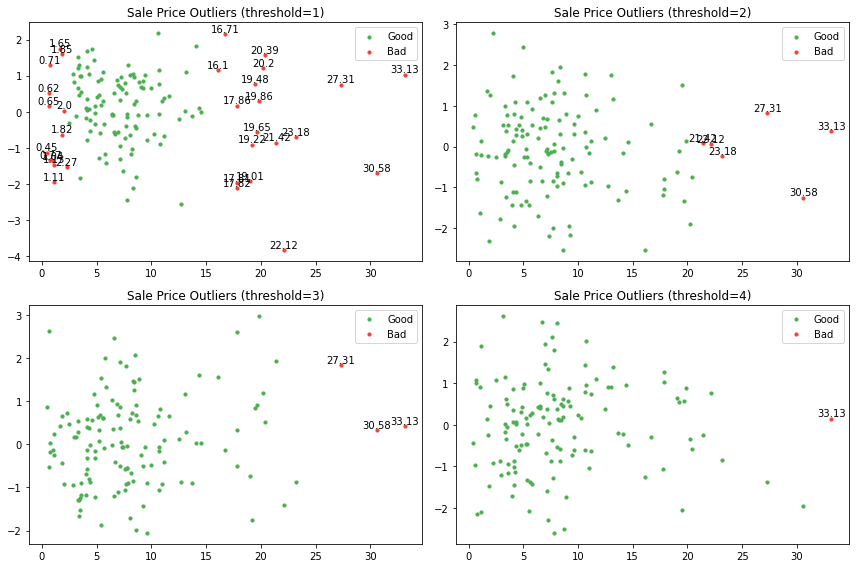

In [18]:
#https://datascienceparichay.com/article/matplotlib-label-points-on-scatter-plot/
plt.figure(figsize=(12, 8))
for i, threshold in zip(range(1, 5), range(1, 5)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=empl_unempl_world.shape[0])
    good = z_score(empl_unempl_world['employment'], threshold=threshold)
    plt.scatter(empl_unempl_world['employment'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(empl_unempl_world['employment'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")

    for (xi, yi) in zip(empl_unempl_world['employment'][~good], visual_scatter[~good]):
        plt.text(xi, yi, round(xi, 2), va='bottom', ha='center')
    
    plt.legend()
    plt.title(f"Sale Price Outliers (threshold={threshold})")

plt.tight_layout()

<p style="color:black; background-color:white; padding:5px;">The graph clearly complements the findings regarding the presence of outliers in the unemployment rate. At different levels of threshold the outliers are visualized precisely. Usually z-score =3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier. </p> 

<p style="color:black; background-color:white; padding:5px;">In the next graph, we will support the conclusions about the presence of outliers in "df_economics1" dataframe that were shown above.</p>

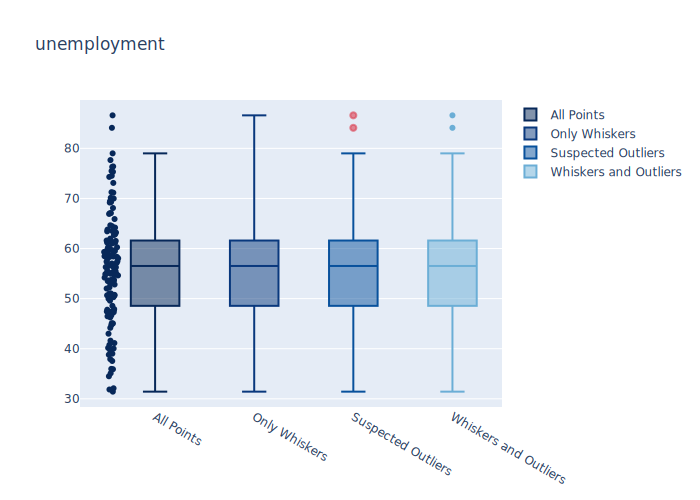

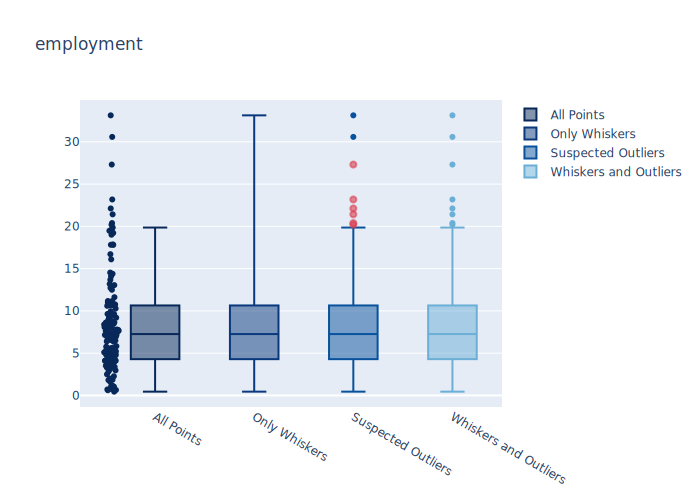

In [19]:
import plotly.graph_objects as go
for x in empl_unempl_world:
    fig = go.Figure()
    fig.add_trace(go.Box(
        y=empl_unempl_world[x],
        name="All Points",
        jitter=0.3,
        pointpos=-1.8,
        boxpoints='all', # represent all points
        marker_color='rgb(7,40,89)',
        line_color='rgb(7,40,89)'
    ))

    fig.add_trace(go.Box(
        y=empl_unempl_world[x],
        name="Only Whiskers",
        boxpoints=False, # no data points
        marker_color='rgb(9,56,125)',
        line_color='rgb(9,56,125)'
    ))

    fig.add_trace(go.Box(
        y=empl_unempl_world[x],
        name="Suspected Outliers",
        boxpoints='suspectedoutliers', # only suspected outliers
        marker=dict(
            color='rgb(8,81,156)',
            outliercolor='rgba(219, 64, 82, 0.6)',
            line=dict(
                outliercolor='rgba(219, 64, 82, 0.6)',
                outlierwidth=2)),
        line_color='rgb(8,81,156)'
    ))

    fig.add_trace(go.Box(
        y=empl_unempl_world[x],
        name="Whiskers and Outliers",
        boxpoints='outliers', # only outliers
        marker_color='rgb(107,174,214)',
        line_color='rgb(107,174,214)'
    ))


    fig.update_layout(title_text=x)
    fig.show(renderer="svg")

<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">Main conclusions that can be drawn from the analysis for the presence of outliers: </ul>
<li style="color:black; background-color:white; padding:5px">first: the unemployment rate turns out to be a problematic indicator in both databases, as in "dr_labor_market" dataframe, it is the only one that shows the presence of outliers at all.</li>
<li style="color:black; background-color:white; padding:5px">second: in a more in-depth analysis, it can be seen that other indicators also show the presence of outliers, although to a lesser extent.</li>
<li style="color:black; background-color:white; padding:5px">third: the relationship between the outliers in absolute value is directly dependent on the number of cases, which to some extent explains their large number in df_economics_removed_outliers dataframe compared to the other indicators, since unemployment starts from the beginning of the studied period.</li>
<li style="color:black; background-color:white; padding:5px">fourth: to some extent, many outliers also find their explanation in the nature of unemployment. Unemployment is most volatile during economic shocks, especially compared to employment. Any environmental economic change can "double" the values ​​and, in certain countries or age groups, reach critical values.</li>
<li style="color:black; background-color:white; padding:5px">fifth: regardless of the fact that they are outliers, these values ​​are real, which requires a thorough study of the structure of unemployment through the prism of demographic structures, gender, age and level of education..</li>
<li style="color:black; background-color:white; padding:5px">sixth: these extreme values ​​require going through a data standardization process especially on unemployment, since the following analysis algorithms are very sensitive to extreme values.<li>

---

In [22]:
import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import SGDOneClassSVM
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import make_pipeline

def outlier_functions(df):
    df = df.dropna()
    # Example settings
    n_samples = 50
    outliers_fraction = 0.20
    n_outliers = int(outliers_fraction * n_samples)
    n_inliers = n_samples - n_outliers

    # define outlier/anomaly detection methods to be compared.
    # the SGDOneClassSVM must be used in a pipeline with a kernel approximation
    # to give similar results to the OneClassSVM
    anomaly_algorithms = [
        ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
        ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1)),
        (
            "One-Class SVM (SGD)",
            make_pipeline(
                Nystroem(gamma=0.1, random_state=42, n_components=40),
                SGDOneClassSVM(
                    nu=outliers_fraction,
                    shuffle=True,
                    fit_intercept=True,
                    random_state=42,
                    tol=1e-6,
                ),
            ),
        ),
        (
            "Isolation Forest",
            IsolationForest(contamination=outliers_fraction, random_state=42),
        ),
        (
            "Local Outlier Factor",
            LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction),
        ),
    ]


    # Compare given classifiers under given settings
    xx, yy = np.meshgrid(np.linspace(30, 90, 150), np.linspace(0, 40, 150))

    fig = plt.figure(facecolor="w", figsize=(20,20))
    plt.subplots_adjust(
        left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.15, hspace=0.01
    )

    plot_num = 1
    rng = np.random.RandomState(42)

    for i_dataset, X in enumerate(np.array([df])):
        # Add outliers
        X = np.concatenate([X, rng.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)

        for name, algorithm in anomaly_algorithms:
            t0 = time.time()
            algorithm.fit(X)
            t1 = time.time()
            plt.subplot(6, 6, plot_num)
            if i_dataset == 0:
                plt.title(name, size=18)

            # fit the data and tag outliers
            if name == "Local Outlier Factor":
                y_pred = algorithm.fit_predict(X)
            else:
                y_pred = algorithm.fit(X).predict(X)

            # plot the levels lines and the points
            if name != "Local Outlier Factor":  # LOF does not implement predict
                Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")

            colors = np.array(["#377eb8", "#ff7f00"])
            plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

            plt.xlim(30, 100)
            plt.ylim(0, 40)
            plt.xticks()
            plt.yticks()
            plt.text(
                0.99,
                0.01,
                ("%.2fs" % (t1 - t0)).lstrip("0"),
                transform=plt.gca().transAxes,
                size=15,
                horizontalalignment="right",
            )
            plot_num += 1

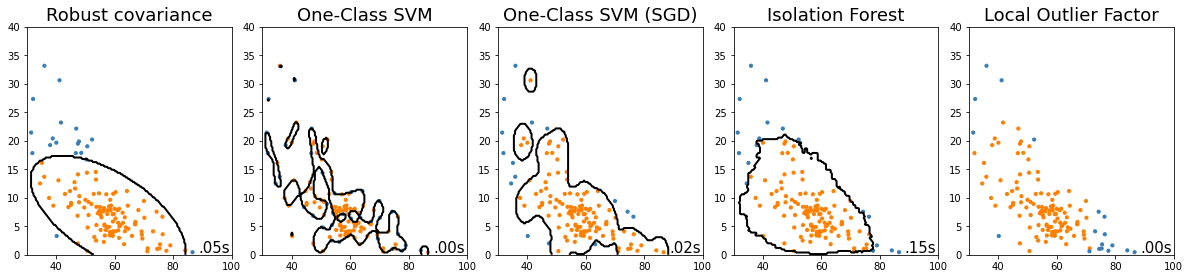

In [23]:
outlier_functions(empl_unempl_world)

In [31]:
example2 = empl_unempl_world.copy()
example2 = example2.dropna()
model_IF = IsolationForest(contamination=float(0.1),random_state=42)

In [32]:
anomaly_inputs = ['unemployment', 'employment']
model_IF.fit(example2[anomaly_inputs])

IsolationForest(contamination=0.1, random_state=42)

In [33]:
example2['anomaly_scores'] = model_IF.decision_function(example2[anomaly_inputs])
example2['anomaly'] = model_IF.predict(example2[anomaly_inputs])

In [34]:
example2

,unemployment,employment,anomaly_scores,anomaly
economy,,,,
ABW,57.130001,10.60,0.126272,1
AGO,69.980003,9.43,0.043769,1
ALB,47.430000,14.09,0.091460,1
ARG,55.540001,7.71,0.168060,1
ARM,50.619999,19.01,0.046411,1
...,...,...,...,...
VNM,75.320000,1.11,0.063730,1
VUT,63.200001,1.85,0.078265,1
YEM,31.860001,17.82,-0.042057,-1


In [35]:
import seaborn as sns
def outlier_plot(data, outlier_method_name, x_var, y_var, 
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):
    
    print(f'Outlier Method: {outlier_method_name}')
    
    # Create a dynamic title based on the method
    method = f'{outlier_method_name}_anomaly'
    
    # Print out key statistics
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')
    
    # Create the chart using seaborn
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return g

Outlier Method: Isolation Forest
Number of anomalous values 13
Number of non anomalous values  118
Total Number of Values: 131


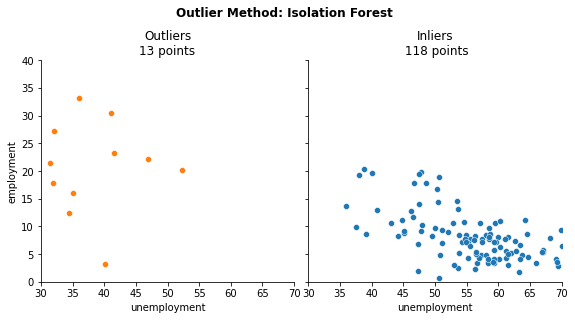

In [36]:
outlier_plot(example2, 'Isolation Forest', 'unemployment', 'employment', [30, 70], [0, 40]);

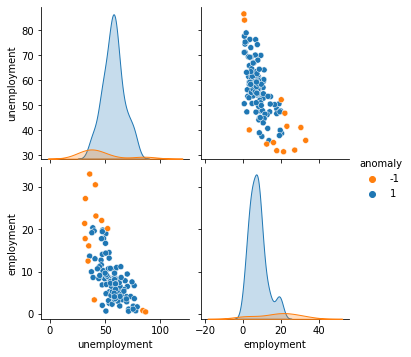

In [37]:
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(example2, vars=anomaly_inputs, hue='anomaly', palette=palette)

In [38]:
def z_score(df, var):
    for i in dict1:
        threshold = 3
        mean = np.mean(df[i])
        std = np.std(df[i])
        z_score_outlier = [i for i in df[i] if (i-mean)/std > threshold]
        print (f" {i}: {z_score_outlier}")

In [39]:
dict1 = ["employment", "unemployment"]
z_score(example2, dict1)

 employment: [27.3099994659424, 30.5799999237061, 33.1300010681152]
 unemployment: []
